In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import sys
sys.maxsize

%matplotlib inline

In [2]:
df = pd.read_csv('DivarCsv.csv', encoding='utf-32') 
df = pd.DataFrame(df)

In [4]:
MeanWithNoise = 1000
Noise_ = df[df['Meterage'] >= MeanWithNoise]
Noise = Noise_.copy()
NotNoise = df[~(df['Meterage'] > MeanWithNoise)]
MeanWithOutNoise = int(NotNoise['Meterage'].mean())
Noise.loc[:,'Meterage'] = MeanWithOutNoise
df[df['Meterage'] > MeanWithNoise] = Noise
# take a look at the dataset
df.head(5)

,Title,Meterage,YearConstruction,NumberOfRooms,HasElevator,HasParking,HasWarehouse,Floor,Neighborhood,TotalPrice,PricePerMeterage,URL
0,۲۶۵ متری فرشته فوق مدرن مشاعات هتلینگ,265,1401,3,1,1,1,6,الهیه,0,0,https://divar.ir/v/۲۶۵-متری-فرشته-فوق-مدرن-مشا...
1,بلوار کشاورز دهکده ۱۹۸ متر تکواحد ۲ پارکینگ,198,1401,3,1,1,1,0,بلوار کشاورز,0,0,https://divar.ir/v/بلوار-کشاورز-دهکده-۱۹۸-متر-...
2,آپارتمان 375 متری ولنجک,375,1398,4,1,1,1,0,ولنجک,0,0,https://divar.ir/v/آپارتمان-375-متری-ولنجک_آپا...
3,۱۴۵متر بوستانها,145,1383,3,1,1,1,4,پاسداران,10100000000,69655000,https://divar.ir/v/۱۴۵متر-بوستانها_آپارتمان_ته...
4,۵۶ متر فول امکانات / خوش نقشه / کم واحد/تخلیه,56,1394,1,1,1,1,4,کوی فردوس,3300000000,58928000,https://divar.ir/v/۵۶-متر-فول-امکانات-خوش-نقشه...


In [6]:
cdf = df[['Meterage', 'YearConstruction','NumberOfRooms','HasElevator','HasParking','HasWarehouse', 'Floor', 'Neighborhood','TotalPrice']]
cdf.head(20)

,Meterage,YearConstruction,NumberOfRooms,HasElevator,HasParking,HasWarehouse,Floor,Neighborhood,TotalPrice
0,265,1401,3,1,1,1,6,الهیه,0
1,198,1401,3,1,1,1,0,بلوار کشاورز,0
2,375,1398,4,1,1,1,0,ولنجک,0
3,145,1383,3,1,1,1,4,پاسداران,10100000000
4,56,1394,1,1,1,1,4,کوی فردوس,3300000000
5,150,1401,3,1,1,1,1,میرداماد,0
6,68,1392,2,1,1,1,1,کوی فردوس,3700000000
7,98,1387,2,1,1,1,0,دارآباد,6400000000
8,89,0,2,0,1,1,0,دروازه شمیران,1900000000
9,150,1400,3,1,1,1,0,شهرک غرب,18500000000


In [7]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
test_ = test
test_.head()

,Meterage,YearConstruction,NumberOfRooms,HasElevator,HasParking,HasWarehouse,Floor,Neighborhood,TotalPrice
0,265,1401,3,1,1,1,6,الهیه,0
4,56,1394,1,1,1,1,4,کوی فردوس,3300000000
9,150,1400,3,1,1,1,0,شهرک غرب,18500000000
13,198,1401,3,1,1,1,0,بلوار کشاورز,0
15,145,1383,3,1,1,1,4,پاسداران,10100000000


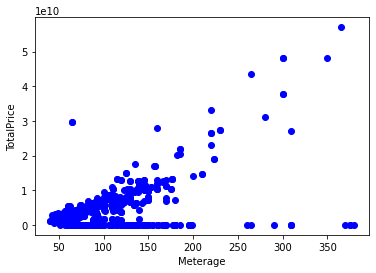

In [8]:
plt.scatter(train.Meterage, train.TotalPrice,  color='blue')
plt.xlabel("Meterage")
plt.ylabel("TotalPrice")
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
Neighborhood_ = df['Neighborhood']
Neighborhood = Neighborhood_.copy()
le = LabelEncoder()
le.fit(Neighborhood)
Neighborhood = le.transform(Neighborhood)
df['Neighborhood'] = Neighborhood

In [10]:
from sklearn import linear_model

Neighborhood_ = df['Neighborhood']
Neighborhood = Neighborhood_.copy()
le = LabelEncoder()
le.fit(Neighborhood)
Neighborhood = le.transform(Neighborhood)
df['Neighborhood'] = Neighborhood
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Meterage', 'YearConstruction', 'NumberOfRooms','HasElevator','HasParking','HasWarehouse', 'Floor']])
y = np.asanyarray(train[['TotalPrice']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 7.39380193e+07  1.47542676e+06 -9.43944873e+08  4.55075557e+08
   8.46981630e+08 -6.91755375e+08 -1.59512418e+08]]


In [11]:
y_hat= regr.predict(test[['Meterage', 'YearConstruction', 'NumberOfRooms','HasElevator','HasParking','HasWarehouse', 'Floor']])
x = np.asanyarray(test[['Meterage', 'YearConstruction', 'NumberOfRooms','HasElevator','HasParking','HasWarehouse', 'Floor']])
y = np.asanyarray(test[['TotalPrice']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 33940328826593550336.00
Variance score: 0.30


c:\Users\ghafari\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
